### Aim

The aims of this lab are to get familiar with Jupyter Notebook - a tool for writing interactive reports - and to review some basic Python tools, such as functions.

### Objectives

At the end of this lab, students should be able to:
1. Create lab reports in Jupyter Notebook.
2. Use appropriate built-in Python functions for typical mathematical calculations (minimum/maximum/ sum of an array, creating diagonal matrices, and finding eigenvalues and eigenvectors etc).
3. Vectorize a `for` loop.
4. Write Python functions.
5. Plot 2D graphs.

# Jupyter Notebook

A *Jupyter Notebook* is a tool for writing interactive reports in Python (and in other programming languages). You are using it right now and we are going to work in Jupyter Notebook until the end of the semester. 

A Jupyter Notebook consists of *markdown* cells, *code* cells, and *raw* cells. For instance, this is a markdown cell and below is a code cell that loads packages and generates a random $2\times 2$ matrix. Note that the output generated by the code cell is printed right after the code cell.

We won't be using raw cells.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time

A = np.random.rand(2,2)
print(A)

[[0.33142241 0.02823324]
 [0.83690481 0.23459046]]


Markdown cells are those where you write normal text meant to be read by another human being, e.g., your tutor. It is recommended to google "markdown syntax" to get familiar with how you highlight words, create lists etc. 

You can also insert LaTeX equations to a markdown cell. For example, here is a displayed equation:
$$
\sum_{n=1}^{\infty}\frac{1}{n^2}=\frac{\pi^2}{6}
$$
and here is an inline equation: $e^{\pi i}+1=0$. Note that when you run a markdown cell, the text becomes nicely formatted. You can download the whole notebook into a PDF document ready for printing.

### Exercise 1

Change the first code chunk so that it prints a random $4\times4$ matrix and download this Notebook into a PDF.

# Built-in Python functions

First, we are going to prepare some data. The following cell generates and prints the vector $v$ of size $n=7$ with entries $v_k=2+8\cos k$ rounded to 1 decimal place.

In [2]:
n = 7
v = np.around(2 + 8 * np.cos(np.arange(1, n+1)), 1)
print(v)

[ 6.3 -1.3 -5.9 -3.2  4.3  9.7  8. ]


The following Python code calculates the sum of elements of the vector `v` in loop:

In [3]:
S = 0;
for i in range(n):
    S = S + v[i];
S

17.9

The same thing can be done by using the `sum()` function, i.e.,

In [4]:
np.sum(v)

17.9

Computing the sum of elements by issuing a ready Python function is cleaner and simpler than implementing it as a `for` loop. Also, it usually works faster and is easier to understand. Note that calculating the sum of elements of a vector can be also implemented via matrix multiplication, but then the code becomes a bit obscure:

In [5]:
v.dot(np.ones(n))

17.9

### Efficiency comparison

Let's compare efficiency of the three methods to calculate the sum of entries of a matrix. We will create a very large vector with random entries and add its entries using the three methods:
1. `for` loop
2. The function `sum`
3. The dot product

In [6]:
N = 10 ** 7
x = np.random.rand(N)

tic = time.time()
S1 = 0;
for i in range(N):
    S1 = S1 + x[i]

print(S1)
toc = time.time()
print('For loop takes ' , toc - tic, ' sec')

tic = time.time()
S2 = np.sum(x)
print(S2)
toc = time.time()
print('Sum function takes ' , toc - tic, ' sec')

tic = time.time()
S3 = x.dot(np.ones(N))
print(S3)
toc = time.time()
print('Dot product takes ' , toc - tic, ' sec')

5000896.093644855
For loop takes  3.1691670417785645  sec
5000896.093645357
Sum function takes  0.010842084884643555  sec
5000896.093645344
Dot product takes  0.11671710014343262  sec


## Exercise 2

Here you will need to figure out what Python codes with loops are designed to do and re-write each of them with a single Python command. In order to do that, you will need to do some google search. For example, if you didn't know how to calculate the sum of entries of a vector in *numpy*, you would google "calculate sum of entries of a vector in numpy". Alternatively, you can browse the *numpy* documentation.

### Part (a)

Figure out what the following sequence of Python commands is designed to do and re-write it as a single native Python command.

In [7]:
ind = 0
M = v[0]
for i in range(1, n):
    if v[i] > M:
        ind = i
        M = v[i]
        
print(ind)

5


### Part (b) 

Figure out what the following sequence of Python commands is designed to do and re-write it as a single native Python command.

In [8]:
A = []
S = 0
for i in range(n):
    S = S + v[i]
    A = np.append(A, S)
print(A)

[ 6.3  5.  -0.9 -4.1  0.2  9.9 17.9]


### Part (c) 

Figure out what the following sequence of Python commands is designed to do and re-write it as a single native Python command.

In [9]:
X = np.zeros((n,n))
for i in range(n):
    X[i, i] = v[i]
    if i < n-1:
        X[i, i+1] = 1
print(X)

[[ 6.3  1.   0.   0.   0.   0.   0. ]
 [ 0.  -1.3  1.   0.   0.   0.   0. ]
 [ 0.   0.  -5.9  1.   0.   0.   0. ]
 [ 0.   0.   0.  -3.2  1.   0.   0. ]
 [ 0.   0.   0.   0.   4.3  1.   0. ]
 [ 0.   0.   0.   0.   0.   9.7  1. ]
 [ 0.   0.   0.   0.   0.   0.   8. ]]


## Solution

### Part (a)

This command finds the largest entry of the vector `v` and prints its position. Here is how we can do it by a single Python command:

In [10]:
print(np.argmax(v))

5


### Part (b)

This command calculates the cumulative sum of entries of the vector `v`. Here is how we can do it by a single Python command:

In [11]:
print(np.cumsum(v))

[ 6.3  5.  -0.9 -4.1  0.2  9.9 17.9]


### Part (c)

This command creates a matrix with entries of `v` on the main diagonal and units right above the main diagonal. Here is how we can do it by a single Python command:

In [12]:
print(np.diag(v) + np.diag(np.ones(n-1), k = 1)) 

[[ 6.3  1.   0.   0.   0.   0.   0. ]
 [ 0.  -1.3  1.   0.   0.   0.   0. ]
 [ 0.   0.  -5.9  1.   0.   0.   0. ]
 [ 0.   0.   0.  -3.2  1.   0.   0. ]
 [ 0.   0.   0.   0.   4.3  1.   0. ]
 [ 0.   0.   0.   0.   0.   9.7  1. ]
 [ 0.   0.   0.   0.   0.   0.   8. ]]


# Custom functions

Of course, not all mathematical function that you may need in your work have been already implemented in Python. As an example, let us implement a Python function that calculates the sum of proper divisors of a number $n$. For example, proper divisors of 60 are 1, 2, 3, 4, 5, 6, 10, 12, 15, 20, and 30 and hence the sum of proper divisors of 60 is

In [13]:
1 + 2 + 3 + 4 + 5 + 6 + 10 +12 + 15 +20 + 30

108

Proper divisors of 60 are numbers $k$ between 1 and 59 such that the remainder of dividing 60 by $k$ is 0. First, let us generate all numbers between 1 and 59:

In [14]:
np.arange(1, 60)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

Now let us find the remainder of dividing 60 by all of them

In [15]:
60 % np.arange(1, 60)

array([ 0,  0,  0,  0,  0,  0,  4,  4,  6,  0,  5,  0,  8,  4,  0, 12,  9,
        6,  3,  0, 18, 16, 14, 12, 10,  8,  6,  4,  2,  0, 29, 28, 27, 26,
       25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1])

Now we generate the array of positions of divisors of 60:

In [16]:
1 * (60 % np.arange(1, 60) == 0)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

And here are the divisors themselves:

In [17]:
np.arange(1, 60) * (60 % np.arange(1, 60) == 0)

array([ 1,  2,  3,  4,  5,  6,  0,  0,  0, 10,  0, 12,  0,  0, 15,  0,  0,
        0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

The sum of divisors of 60 is therefore

In [18]:
np.sum(np.arange(1, 60) * (60 % np.arange(1, 60) == 0))

108

Recall the following Python construction that defines a function

In [19]:
def sum_of_divisors(n):
    return np.sum(np.arange(1, n) * (n % np.arange(1, n) == 0))

Now we can calculate the sum of divisors of any number

In [20]:
sum_of_divisors(28)

28

## Exercise 3

## Solution

### Part (a)

Write a Python function that takes a positive integer $n$ as input and returns the number of its proper divisors

Note that we don't need to check all the numbers up to $n$, it's sufficient to check until $n/2$. It's not the most optimized way to implement the number of divisors function, but it'll do.

In [21]:
def num_divisors(n):
    return np.sum(n % np.arange(1, n // 2 + 1) == 0)

num_divisors(3)

1

### Part (b)

Write a Python function that takes a positive integer $n$ as input and returns 1 if $n$ is a prime number and 0 otherwise


Here, note two things: 
* We need to treat the case $n=1$ separately because $1$ is not a prime number.
* It's enough to check all potential divisors up to $\sqrt{n}$.

In [22]:
def is_prime(n):
    if (n == 1):
        return 0
    return 1 * (np.sum(n % np.arange(1, int(np.sqrt(n) + 1)) == 0) == 1)

is_prime(25)

0

### Part (c)

Write a Python function that takes a positive integer $n$ as input and returns the list of its proper divisors

Here we need to remove all zeroes from the list of divisors that we know how to compute. This can be done by clever indexing.

In [23]:
def divisors(n):
    nums = np.arange(1, n // 2 + 1) # all the positive integers from 1 to n/2
    div_pos = n % nums == 0 # positions of divisors
    return (nums * div_pos)[div_pos]

print(divisors(60))

[ 1  2  3  4  5  6 10 12 15 20 30]


# Vectorizing a loop

One often needs to apply a function to each element of a vector. For instance, the following loop produces a vector `s` whose entries are squares of the vector `v`.

In [24]:
s = v-v
for i in range(n):
    s[i] = v[i] ** 2

print(s)

[39.69  1.69 34.81 10.24 18.49 94.09 64.  ]


Of course, if we need to apply the square function to each entry of a vector, there is a native Python operation for that:

In [25]:
print(v ** 2)

[39.69  1.69 34.81 10.24 18.49 94.09 64.  ]


But what if we want to apply a function that can't be expressed as a simple formula to each entry of a vector? In order to do this, we use the *numpy* function `vectorize` whose input is a function(!) and whose output is the vectorized version of the same function. Let's see how it works with the square function first. 

In [26]:
def square(x):
    return x ** 2

square_vectorized = np.vectorize(square)

print(square_vectorized(v))

[39.69  1.69 34.81 10.24 18.49 94.09 64.  ]


Note that, strictly speaking, we did not have to do this because our `square` function accepts an argument `x` that may be a vector and it will work correctly for a vector input. Nevertheless, let's compare efficiency of the three ways to square each entry of a vector.

There is one more way to do it that also uses a `for` loop but the loop is nicely formatted and is more human-interpretable than the explicit `for` loop. Note, however, that the result has type `list`

In [27]:
[i ** 2 for i in v]

[39.69,
 1.6900000000000002,
 34.81,
 10.240000000000002,
 18.49,
 94.08999999999999,
 64.0]

## Compare efficiency

We will see that the explicit `for` loop is the least efficient method of applying a function to each entry of an array and a native *numpy* function is the most efficient.

In [28]:
tic = time.time()
S1 = np.zeros(N);
for i in range(N):
    S1[i] = x[i] ** 2

print(S1[np.arange(10)])
toc = time.time()
print('Explicit for loop takes ', toc - tic, ' sec')

tic = time.time()
S2 = x ** 2
print(S2[np.arange(10)])
toc = time.time()
print('Native numpy function takes ', toc - tic, ' sec')

tic = time.time()
S3 = square_vectorized(x)
print(S3[np.arange(10)])
toc = time.time()
print('Vectorize takes ' , toc - tic, ' sec')

tic = time.time()
S4 = [i ** 2 for i in x]

print(S4[0:10])
toc = time.time()
print('Nicely formatted for loop takes ', toc - tic, ' sec')

[6.76909702e-01 2.95603875e-01 6.32627195e-02 1.03660020e-01
 1.49765540e-01 1.47628499e-01 5.37039223e-04 6.57829301e-01
 9.99440890e-01 1.30101859e-03]
Explicit for loop takes  6.235198974609375  sec
[6.76909702e-01 2.95603875e-01 6.32627195e-02 1.03660020e-01
 1.49765540e-01 1.47628499e-01 5.37039223e-04 6.57829301e-01
 9.99440890e-01 1.30101859e-03]
Native numpy function takes  0.10396695137023926  sec
[6.76909702e-01 2.95603875e-01 6.32627195e-02 1.03660020e-01
 1.49765540e-01 1.47628499e-01 5.37039223e-04 6.57829301e-01
 9.99440890e-01 1.30101859e-03]
Vectorize takes  3.1788229942321777  sec
[0.6769097022594293, 0.2956038754453566, 0.06326271951470808, 0.1036600201037558, 0.14976554004612092, 0.1476284987979822, 0.0005370392228783842, 0.6578293006914491, 0.9994408896951193, 0.0013010185879342119]
Nicely formatted for loop takes  3.9835057258605957  sec


## Non-numpy function

Now let's look at an example of vectorizing a non-native *numpy* function, e.g., the function `sum_of_divisors` from the previos section. Note that trying to run something like `sum_of_divisors(np.arange(0, 60))` will result in an error message because the function `sum_of_divisors` is essentially a function of a scalar input.

To calculate the sum of divisors of $n$ for all $n=1,2,3,\cdots,60$, we will need to vectorize it

In [29]:
sum_of_divisors_vec = np.vectorize(sum_of_divisors)
print(sum_of_divisors_vec(np.arange(1, 61)))

[  0   1   1   3   1   6   1   7   4   8   1  16   1  10   9  15   1  21
   1  22  11  14   1  36   6  16  13  28   1  42   1  31  15  20  13  55
   1  22  17  50   1  54   1  40  33  26   1  76   8  43  21  46   1  66
  17  64  23  32   1 108]


## Exercise 4

The following chunk of Python code applies a certain function to all entries of the vector $v=(1,2,\cdots,60)$. Figure out which function is applied here and re-write this code chunk using `vectorize` so that the function is applied to $v$ in one Python command. As an extra challenge, try to define the function without using a loop.

In [30]:
n = 60
v = np.arange(1, n+1)

s = []
for i in range(n):
    D = 2
    p = 0
    while (D <= v[i]) and (v[i]%D == 0):
        p = p + 1
        D = D * 2
    s.append(p)

print(s)

[0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 4, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 5, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 4, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 2]


### Solution 

The sequence of commands calculates the largest power of 2 that $n$ is divisible by for $n=1,2,3,\cdots, 60$. To vectorize it, we introduce the function of an integer $n$ that returns the largest power of $2$ that $n$ is divisible by and apply it to each entry of the vector $(1,2,\cdots,60)$.

In [31]:
def largest_power_of_2_scalar(n):
    # returns the largest power of 2 that n is divisible by
    count = 0
    while n%2 == 0:
        count = count + 1
        n = n // 2
    return count

largest_power_of_2 = np.vectorize(largest_power_of_2_scalar)
print(largest_power_of_2(np.arange(1, 61)))

[0 1 0 2 0 1 0 3 0 1 0 2 0 1 0 4 0 1 0 2 0 1 0 3 0 1 0 2 0 1 0 5 0 1 0 2 0
 1 0 3 0 1 0 2 0 1 0 4 0 1 0 2 0 1 0 3 0 1 0 2]


There is another way to define such a function by just trying to divide $n$ by $1,2,4,8$ etc. and taking the largest power that $n$ is divisible by. This method is less efficient but is probably more readable.

In [32]:
def largest_power_of_2_scalar_alt(n):
    # returns the largest power of 2 that n is divisible by
    x = 2 ** np.arange(0, int(np.log2(n) + 1))
    return np.max(np.where(n % x == 0))

largest_power_of_2_alt = np.vectorize(largest_power_of_2_scalar_alt)
print(largest_power_of_2_alt(np.arange(1, 61)))

[0 1 0 2 0 1 0 3 0 1 0 2 0 1 0 4 0 1 0 2 0 1 0 3 0 1 0 2 0 1 0 5 0 1 0 2 0
 1 0 3 0 1 0 2 0 1 0 4 0 1 0 2 0 1 0 3 0 1 0 2]


## Exercise 5

Fibonacci numberes $F_n$ are defined by the recurrence relation $F_0=0$, $F_1=1$ and $F_{n}=F_{n-1}+F_{n-2}$ for $n\ge 2$. A few first Fibonacci numbers are $0, 1, 1, 2, 3, 5, 8$. 

The following Python function returns the $n$th Fibonacci number. It is implemented in the way that mimics the defining recurrence relation.

In [33]:
def fibonacci (n):
    if n == 0:
        out = 0
    elif n == 1:
        out = 1
    else:
        out = fibonacci (n -1) + fibonacci (n -2)
    return out

In [34]:
fibonacci(15)

610

## Solution

### Part (a)

Use a `for` to write a function that takes a positive integer value $n$ as input, and returns the $n$th Fibonacci number. You will need to store Fibonacci numbers in an array and calculate them one by one.

Below is the required function

In [35]:
def fibonacci_for(n):
    if n==0:
        out=0
    elif n==1:
        out=1
    else:
        f = np.array(np.zeros(n+1), dtype = int) 
        f[1]=1
        for i in range(2, n+1):
            f[i] = f[i-1] + f[i-2] 
        out = f[n]
    return out

### Part (b)

Use the following matrix identity to write a function that calculates the $n$th Fibonacci number via matrix power without a loop or a recursion:
$$
\begin{bmatrix}
F_{n}\\
F_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
F_{n-1}+F_{n-2}\\
F_{n-1}
\end{bmatrix}=A\cdot
\begin{bmatrix}
F_{n-1}\\
F_{n-2}
\end{bmatrix}
$$

You will need to find $A$ in this identity

Below is the required function

In [36]:
def fibonacci_matrix (n):
    A = np.mat([[1 ,1], 
                [1 ,0]])
    return (A ** n)[0, 1]

### Part (c)

Compare the three Fibonacci functions. Which of them is the slowest? Why? You will need to use the same technique as we used above to compare different ways to apply a function to each entry of an array.

In [37]:
tic = time.time()
print(fibonacci(35))
toc = time.time()
print('Recursion runs ', toc-tic, ' sec')

tic = time.time()
print(fibonacci_for(35))
toc = time.time()
print ('For loop runs ', toc-tic, ' sec')

tic = time.time()
print(fibonacci_matrix(35))
toc = time.time()
print ('Matrix power runs ', toc-tic, ' sec')


9227465
Recursion runs  6.218962907791138  sec
9227465
For loop runs  0.002112150192260742  sec
9227465
Matrix power runs  0.0009028911590576172  sec


The recursion is much slower. It requires exponential time in $n$ to run because each calculation is done multiple times. For instance, $F_{35}=F_{33}+F_{34}$.  But then $F_{34}=F_{33}+F_{32}$. It means that $F_{33}$ will be calculated independently when $F_{35}$ is calculated and when $F_{34}$ is calculated.

It's hard to say whether the for loop or the matrix power algorithm is faster. We could try to compare them for calculating huge Fibonacci numbers, but it will just result in overflow.

# Plotting

The Python library compatible with *numpy* types and functions that is usually used for plotting is *matplotlib.pyplot*. It was imported in the first code cell of this Notebook. Below we just review some basic functionality.

A basic function in *matplotlib.pyplot* for plotting a 2D graph is `plot`. If it is called with one vector input of size $n$, say, $y$, then it will plot a line through points $(1, y_1)$, $(2, y_2)$, $(3, y_3)$ etc. If it is called with two vector inputs $x$ and $y$, then it will plot a line through points $(x_1,y_1)$, $(x_2, y_2)$, $(x_3, y_3)$ etc.

The command `plot` should be followed by the command `show` that actually makes the plot appear on the screen.

### Example 1

Here we will plot the sum of proper divisors of $n$ vs $n$ for $1\le n\le 60$

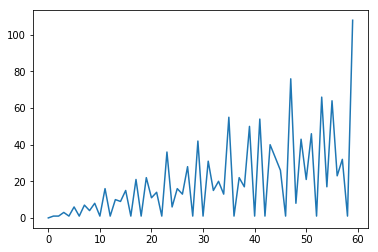

In [38]:
plt.plot(sum_of_divisors_vec(np.arange(1, 61)))
plt.show()

### Example 2

Here we will plot the graph of the function $f(x)=\frac{1}{1+e^{-x}}$ for $-3\le x\le 3$

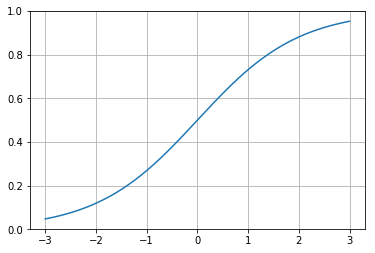

In [39]:
x = np.linspace(start = -3, stop = 3, num = 301)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.grid(True)
plt.show()

It is recommended to read the manual on the `plot` function and to look for examples of plotting online.

## Exercise 6

Consider the series
$$
\sum_{n=1}^\infty \cos n
$$
and its partial sums
$$
A_n=\sum_{k=1}^{n}\cos k,\quad k=1,2,3,\cdots
$$


## Solution

### Part (a)

Without using any loop or recursion, write a single Python command that calculates partial sums $A_1,A_2,\dots,A_{300}$

In [41]:
A = np.cumsum (np.cos ( np.arange (1 ,301) ))

### Part (b)

Plot the $n$'th partial sum $A_n$ vs $n$ for $1\le n\le 300$

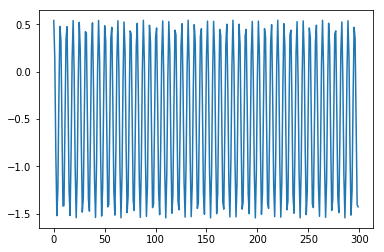

In [42]:
plt.plot(A)
plt.show()

### Part (c)

Does the series appear to converge? If so, to what value (in 2 significant digits)? If not, can you prove it?

The series seems to diverge since partial sums do not approach any particular value. It can be proved rigorously by the Limit Test: since $\lim_{n\to\infty}\cos n$ is undefined (was in Calculus I), the series 
$$
\sum_{n=1}^\infty \cos n
$$
diverges.

### Part (d)

Are partial sums bounded? Can you prove it?

Partial sums are bounded, i.e., there exist real numbers $m$ and $M$ such that
$$
m\le \sum_{k=1}^n \cos k\le M
$$
for all $n$. From the plot, the best for $M$ seems to be slightly more than $0.5$ and for $m$ slightly less than $-1.5$.

Here is how we can prove it rigorously:
\begin{align*}
A_n&=\sum_{k=1}^n \cos k=
\mathrm{Re}\sum_{k=1}^n e^{ik}=
\mathrm{Re}\sum_{k=1}^n \left(e^{i}\right)^k=
-1+\mathrm{Re}\sum_{k=0}^n \left(e^{i}\right)^k=
-1+\mathrm{Re}\left(
\frac{1-e^{i(n+1)}}{1-e^i}\right)\\
&=\frac{1}{2} \left(\cos (n)+\cot \left(\frac{1}{2}\right) \sin (n)-1\right)
\end{align*}
which is, clearly, bounded.

# Conclusion

In today's lab, we covered some material familiar from Algorithms and Computing I and II - Python functions and basic plotting tools. Besides, we reviewed methods to vectorize Python codes offered by the library *numpy*, some familiar from weeks 1-2, some new (the function `vectorize`). The main takeaway is that a vectorized code, if implemented properly, is better than an explicit loop because it is more efficient and more readable. Also, whenever possible it is recommended not to reinvent the wheel and to use functions that already have been implemented in Python instead of writing your own versions. For instance, functions for sum, cumulative sum, max and min are available in *numpy*.